# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

<img src='starwars.png' alt='Star Wars: The Force Awakens' width='800' height='800'>

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this project we will answer the following questions:

1. Among the Star Wars and Star Trek franchise, which has more balance between fans gender?
2. Rank favorite episodes according to the opinion of users.
3.    
    a) Which character do respondents like the most?  
    b) Which character do respondents dislike the most?  
    c) Which character is the most controversial (split between likes and dislikes)? 
    
4. Which region has the most fans who prefer Episode 1 over the rest? 

The data has several columns, including:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household Income` - The respondent's income
- `Education` - The respondent's education level
- `Location (Census Region)` - The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a `Yes` or `No` response

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [3]:
pd.set_option('display.max_columns', 38)

---
## Dataset overview

In [4]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


---
### Clearing Column Names

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The column names are too long to be displayed. We will reduce some of the names. In addition, the data in the first row of the dataset are also part of the issues listed in the columns, we will adapt them to the columns.

In [6]:
star_wars.rename(columns={
    'Have you seen any of the 6 films in the Star Wars franchise?':'Have you seen any of the 6 episodes?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Star Wars fan',
    'Which of the following Star Wars films have you seen? Please select all that apply.':'Have you seen the following Episodes? Episode 1',
    'Unnamed: 4':'Episode 2',
    'Unnamed: 5':'Episode 3',
    'Unnamed: 6':'Episode 4',
    'Unnamed: 7':'Episode 5',
    'Unnamed: 8':'Episode 6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':
    'Rank the episodes from 1 (best) to 6 (worst). 1',
    'Unnamed: 10':'2',
    'Unnamed: 11':'3',
    'Unnamed: 12':'4',
    'Unnamed: 13':'5',
    'Unnamed: 14':'6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':
    'Your view about the following characters: Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda',
    star_wars.columns[-7]:'Expanded Universe fan',
    'Do you consider yourself to be a fan of the Star Trek franchise?':'Star Trek fan'
    }, inplace=True)

In [7]:
star_wars.drop([0], inplace=True)
star_wars.head(2)

,RespondentID,Have you seen any of the 6 episodes?,Star Wars fan,Have you seen the following Episodes? Episode 1,Episode 2,Episode 3,Episode 4,Episode 5,Episode 6,Rank the episodes from 1 (best) to 6 (worst). 1,2,3,4,5,6,Your view about the following characters: Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Expanded Universe fan,Star Trek fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


---
## Dropping useless columns and work with null values

In [8]:
# percentage of null values in each column
star_wars.isnull().sum().sort_values() / star_wars.shape[0]

RespondentID                                          0.000000
Have you seen any of the 6 episodes?                  0.000000
Star Trek fan                                         0.099494
Age                                                   0.118044
Gender                                                0.118044
Location (Census Region)                              0.120573
Education                                             0.126476
Household Income                                      0.276560
Star Wars fan                                         0.295110
2                                                     0.295110
4                                                     0.295110
5                                                     0.295110
6                                                     0.295110
Rank the episodes from 1 (best) to 6 (worst). 1       0.295953
3                                                     0.295953
Luke Skywalker                                        0

In [9]:
star_wars.drop(columns=['Have you seen any of the 6 episodes?',
                'Are you familiar with the Expanded Universe?', 
                'Expanded Universe fan', 
                'Which character shot first?',
                'Household Income',
                'Age',
                'Education',
                'Have you seen the following Episodes? Episode 1',
                'Episode 2', 
                'Episode 3', 
                'Episode 4', 
                'Episode 5', 
                'Episode 6'
               ], inplace=True)

In [10]:
star_wars.isnull().sum().sort_values() / star_wars.shape[0]

RespondentID                                          0.000000
Star Trek fan                                         0.099494
Gender                                                0.118044
Location (Census Region)                              0.120573
4                                                     0.295110
5                                                     0.295110
6                                                     0.295110
Star Wars fan                                         0.295110
2                                                     0.295110
3                                                     0.295953
Rank the episodes from 1 (best) to 6 (worst). 1       0.295953
Luke Skywalker                                        0.299325
Princess Leia Organa                                  0.299325
R2 D2                                                 0.300169
Your view about the following characters: Han Solo    0.301012
C-3P0                                                 0

There is a big number of null values in our data. Drop all the null values will result in a huge data loss. We will replace the null values for "Did not answer"

In [11]:
star_wars.fillna('Did not answer', inplace=True)

In [12]:
star_wars.isnull().sum().sort_values() / star_wars.shape[0]

RespondentID                                          0.0
Star Trek fan                                         0.0
Yoda                                                  0.0
Padme Amidala                                         0.0
Jar Jar Binks                                         0.0
R2 D2                                                 0.0
C-3P0                                                 0.0
Boba Fett                                             0.0
Lando Calrissian                                      0.0
Darth Vader                                           0.0
Emperor Palpatine                                     0.0
Gender                                                0.0
Obi Wan Kenobi                                        0.0
Princess Leia Organa                                  0.0
Luke Skywalker                                        0.0
Your view about the following characters: Han Solo    0.0
6                                                     0.0
5             

---
## Clearing "RespondentID" column

In [13]:
star_wars['RespondentID'].value_counts(dropna=False).sort_index()

3.288373e+09    1
3.288373e+09    1
3.288375e+09    1
3.288379e+09    1
3.288389e+09    1
               ..
3.292731e+09    1
3.292763e+09    1
3.292765e+09    1
3.292880e+09    1
3.292880e+09    1
Name: RespondentID, Length: 1186, dtype: int64

The values in RespondentID column are unique. The column is ok!

---
## Cleaning the columns:
- "Star Wars fan",
- "Star Trek fan"

All these columns should have values True/False

In [14]:
for col in ['Star Wars fan', 'Star Trek fan']:
    print(80*'-',f'\n{star_wars[col].value_counts(dropna=False)}','\n')

-------------------------------------------------------------------------------- 
Yes               552
Did not answer    350
No                284
Name: Star Wars fan, dtype: int64 

-------------------------------------------------------------------------------- 
No                641
Yes               427
Did not answer    118
Name: Star Trek fan, dtype: int64 



The columns are ok!

---
## Cleaning the columns: 
- "Rank the episodes from 1 (best) to 6 (worst). 1"
- "2"
- "3"
- "4"
- "5"
- "6"

In [15]:
cols = ['Rank the episodes from 1 (best) to 6 (worst). 1', '2', '3', '4', '5', '6']

In [16]:
for col in cols:
    print(80*'-',f'\n{star_wars[col].value_counts(dropna=False)}','\n')

-------------------------------------------------------------------------------- 
Did not answer    351
4                 237
6                 168
3                 130
1                 129
5                 100
2                  71
Name: Rank the episodes from 1 (best) to 6 (worst). 1, dtype: int64 

-------------------------------------------------------------------------------- 
Did not answer    350
5                 300
4                 183
2                 116
3                 103
6                 102
1                  32
Name: 2, dtype: int64 

-------------------------------------------------------------------------------- 
Did not answer    351
6                 217
5                 203
4                 182
3                 150
2                  47
1                  36
Name: 3, dtype: int64 

-------------------------------------------------------------------------------- 
Did not answer    350
1                 204
6                 161
2                 135
4   

The columns look ok.

## Clearing character columns

In [17]:
star_wars.columns

Index(['RespondentID', 'Star Wars fan',
       'Rank the episodes from 1 (best) to 6 (worst). 1', '2', '3', '4', '5',
       '6', 'Your view about the following characters: Han Solo',
       'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
       'Padme Amidala', 'Yoda', 'Star Trek fan', 'Gender',
       'Location (Census Region)'],
      dtype='object')

In [18]:
cols = ['Your view about the following characters: Han Solo',
       'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
       'Padme Amidala', 'Yoda']

In [19]:
for col in cols:
    print(80*'-',f'\n{star_wars[col].value_counts(dropna=False)}','\n')

-------------------------------------------------------------------------------- 
Very favorably                                 610
Did not answer                                 357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Your view about the following characters: Han Solo, dtype: int64 

-------------------------------------------------------------------------------- 
Very favorably                                 552
Did not answer                                 355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Luke Skywalker, dtype: int64 

------------

All the above columns look ok. All have the same values.

## Cleaning "Gender", "Location (Census Region)" columns

In [20]:
cols = ['Gender', 'Location (Census Region)']

In [21]:
for col in cols:
    print(80*'-',f'\n{star_wars[col].value_counts(dropna=False)}','\n')

-------------------------------------------------------------------------------- 
Female            549
Male              497
Did not answer    140
Name: Gender, dtype: int64 

-------------------------------------------------------------------------------- 
East North Central    181
Pacific               175
South Atlantic        170
Did not answer        143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64 



The "Gender" and "Location (Census Region)" column are ok.

Print the first 5 rows after cleaning all columns in our dataset:

In [22]:
star_wars.head()

,RespondentID,Star Wars fan,Rank the episodes from 1 (best) to 6 (worst). 1,2,3,4,5,6,Your view about the following characters: Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Star Trek fan,Gender,Location (Census Region)
1,3.292880e+09,Yes,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,No,Male,South Atlantic
2,3.292880e+09,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Did not answer,Yes,Male,West South Central
3,3.292765e+09,No,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),No,Male,West North Central
4,3.292763e+09,Yes,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Yes,Male,West North Central
5,3.292731e+09,Yes,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,No,Male,West North Central


---
# Question 1. Among the Star Wars and Star Trek franchise, which has more balance between fans gender?

Counting the percentage of star wars fans by gender. We do not consider the null values for our analysis.

In [23]:
star_wars.loc[star_wars['Star Wars fan']=='Yes', 'Gender'].value_counts(normalize=True)

Male              0.548913
Female            0.431159
Did not answer    0.019928
Name: Gender, dtype: float64

In [24]:
star_wars.loc[star_wars['Star Trek fan']=='Yes', 'Gender'].value_counts(normalize=True)

Male              0.552693
Female            0.437939
Did not answer    0.009368
Name: Gender, dtype: float64

We can see that the gender gap between the fans of the two franchises is almost similar. The Star Trek franchise is a little more balanced among the genre of fans.

# Question 2. Rank favorite episodes according to the opinion of users.

Let's plot a bar chart with the favorite episodes according to the users' votes. Here we are excluding the null values for our analysis.

In [25]:
[f'Episode {i}' for i in range(1,6)]+['Did not answer']

['Episode 1',
 'Episode 2',
 'Episode 3',
 'Episode 4',
 'Episode 5',
 'Did not answer']

In [26]:
star_wars['Rank the episodes from 1 (best) to 6 (worst). 1'].value_counts().sort_index()

1                 129
2                  71
3                 130
4                 237
5                 100
6                 168
Did not answer    351
Name: Rank the episodes from 1 (best) to 6 (worst). 1, dtype: int64

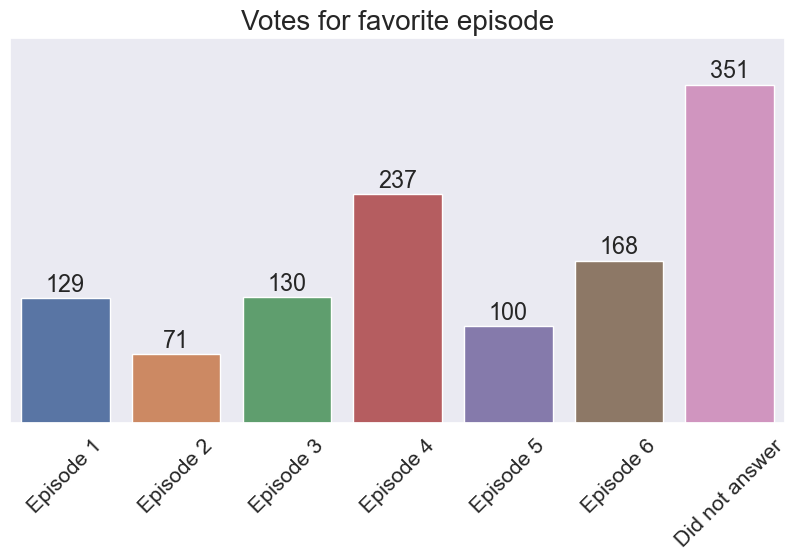

In [27]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
gr=sns.barplot(
    x=[f'Episode {i}' for i in range(1,7)]+['Did not answer'],\
    y=star_wars['Rank the episodes from 1 (best) to 6 (worst). 1'].value_counts().sort_index())

gr.set(xlabel='', ylabel='')
gr.set_xticklabels(gr.get_xticklabels(), rotation=45)
plt.title('Votes for favorite episode', fontsize=20)
gr.grid(False)
gr.tick_params(labelleft=False)
gr.set_ylim([0,400])
for p in gr.patches:  
    gr.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

Episode 4 was the most cited favorite among fans.

---
## Question 3. 
    a) Which character do respondents like the most?
    b) Which character do respondents dislike the most?
    c) Which character is the most controversial (split between likes and dislikes)?

In [28]:
star_wars['Your view about the following characters: Han Solo'].value_counts()

Very favorably                                 610
Did not answer                                 357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Your view about the following characters: Han Solo, dtype: int64

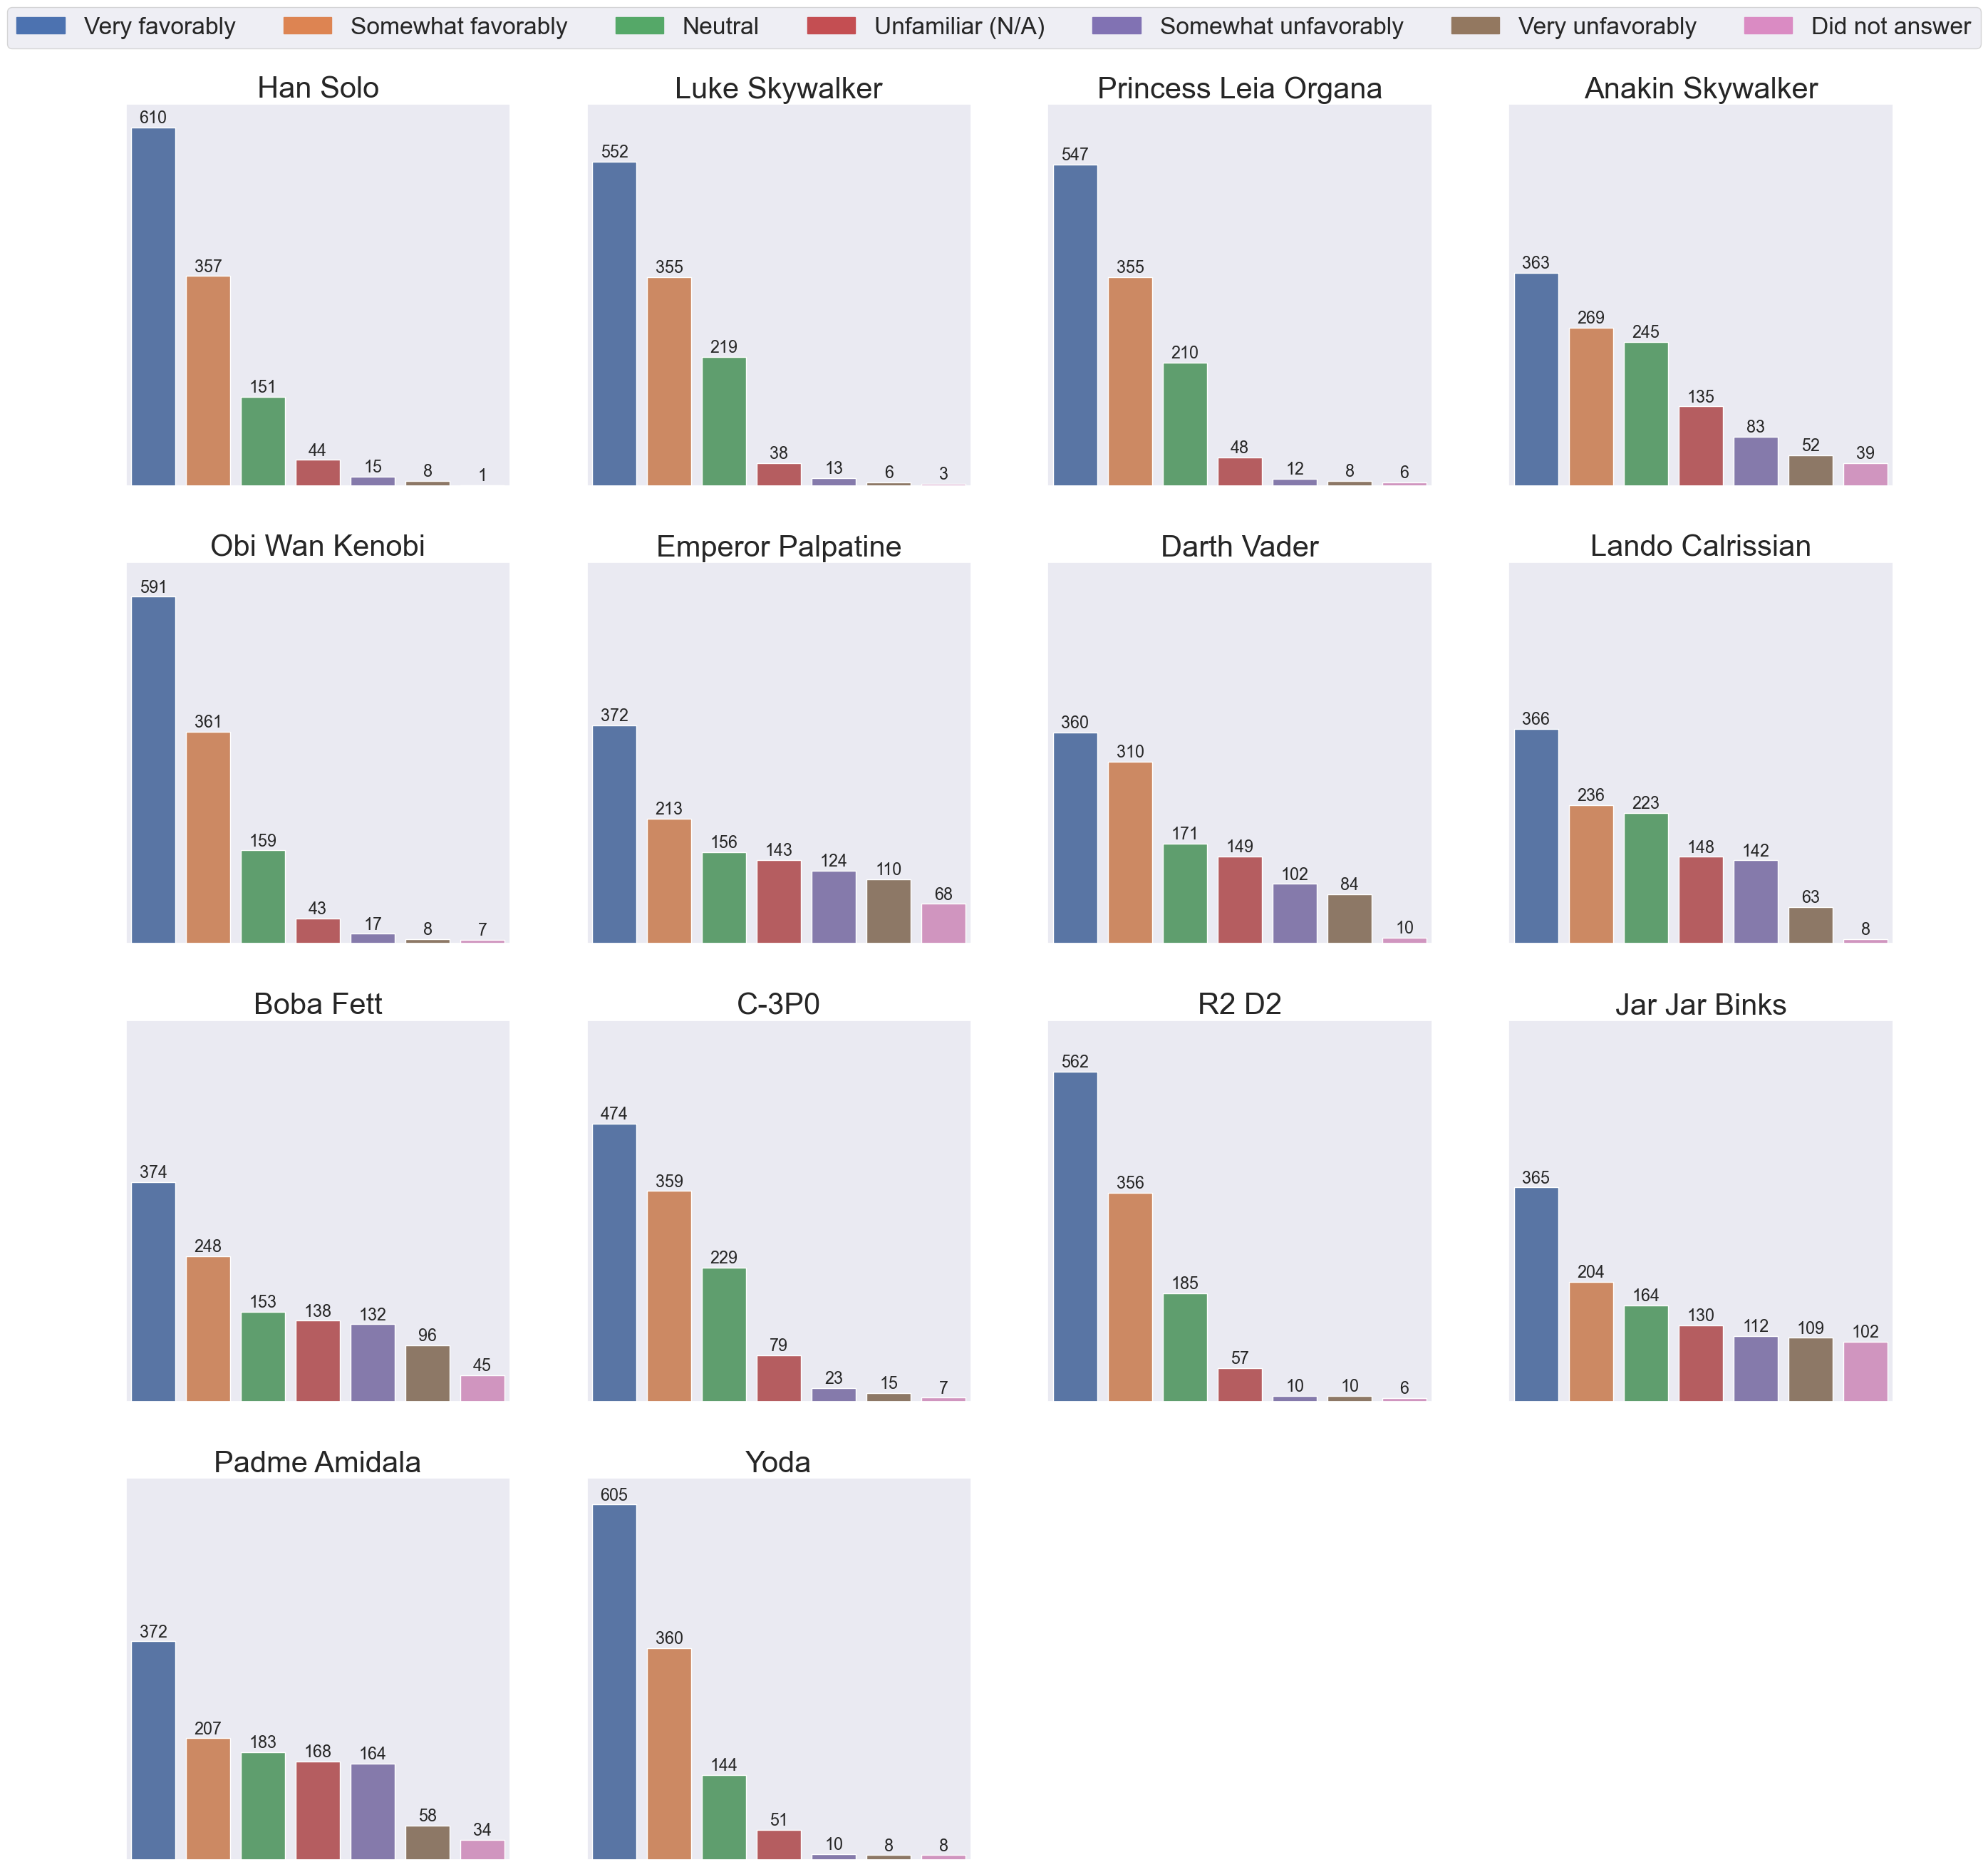

In [29]:
fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(4,4,1)
# sns.set(font_scale=2)
options = ['Very favorably', 
           'Somewhat favorably', 
           'Neutral', 'Unfamiliar (N/A)', 
           'Somewhat unfavorably', 
           'Very unfavorably',
           'Did not answer']
ax = sns.barplot(x=options, y=star_wars['Your view about the following characters: Han Solo'].value_counts())
ax.tick_params(labelbottom=False, labelleft=False)
ax.set(xlabel='', ylabel='')
plt.title('Han Solo', fontsize=30)
ax.set_ylim([0,650])
ax.grid(False)

colors = sns.color_palette()
leg_patch = [mpatches.Patch(color=colors[i], label=options[i]) for i in range(7)]
ax.legend(handles=leg_patch, ncol=7, bbox_to_anchor=(2.26, 1.2), loc='center', fontsize='x-large')
for p in ax.patches:  
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
############################################################################################################################
    
for i in range(2,star_wars.loc[:,'Luke Skywalker':'Yoda'].shape[1]+2):
    ax = fig.add_subplot(4,4,i)
    ax = sns.barplot(x=options, y=star_wars.loc[:,'Luke Skywalker':'Yoda'].iloc[:,i-2].value_counts())
    ax.grid(False)
    plt.title(star_wars.loc[:,'Luke Skywalker':'Yoda'].columns[i-2], fontsize=30)
    ax.set_ylim([0,650])
    ax.set(xlabel='', ylabel='')
    ax.tick_params(labelbottom=False, labelleft=False)
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.show()

Answers:

Han Solo is the most beloved character in the series followed by Yoda and Obi Wan Kenobi. In general, all characters are rated highly. Jar Jar Binks is the least beloved and controversial character in the series. He proportionally received all types of opinions. Emperor Palpatine is also not highly rated.

---
## Question 4. Which region has the most fans who prefer Episode 1 over the rest?

In [30]:
star_wars.columns

Index(['RespondentID', 'Star Wars fan',
       'Rank the episodes from 1 (best) to 6 (worst). 1', '2', '3', '4', '5',
       '6', 'Your view about the following characters: Han Solo',
       'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
       'Padme Amidala', 'Yoda', 'Star Trek fan', 'Gender',
       'Location (Census Region)'],
      dtype='object')

In [31]:
ep_1_fans = star_wars[star_wars['Rank the episodes from 1 (best) to 6 (worst). 1']=='1'].copy()

In [32]:
ep_1_fans['Location (Census Region)'].value_counts()

Pacific               26
East North Central    21
South Atlantic        18
West South Central    16
West North Central    13
Middle Atlantic       12
Mountain              11
Did not answer         6
New England            4
East South Central     2
Name: Location (Census Region), dtype: int64

In the Pacific region, there are more fans who prefer Episode 1 to the rest.